# Importing neccessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

# Uploading Data 

In [2]:
df = pd.read_csv(r'D:\Projects\Python\HousingListings.csv', encoding='latin1')
pd.set_option('display.max_rows', None)     # to read all the columns

df.head(3)

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0


# Data Details

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35768 entries, 0 to 35767
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  35768 non-null  object 
 1   Price                 35768 non-null  float64
 2   Address               35768 non-null  object 
 3   Number_Beds           35768 non-null  int64  
 4   Number_Baths          35768 non-null  int64  
 5   Province              35768 non-null  object 
 6   Population            35768 non-null  int64  
 7   Latitude              35768 non-null  float64
 8   Longitude             35768 non-null  float64
 9   Median_Family_Income  35768 non-null  float64
dtypes: float64(4), int64(3), object(3)
memory usage: 2.7+ MB


**By checking data info, we can see that we don't have any missing values and there is no need to worry about.**

**Next step is checking Data types**

# Updating Data types


In [4]:
df['City'] = df['City'].astype('category')
df['Province'] = df['Province'].astype('category')

df['Price'] = df['Price'].astype('int64')
df['Median_Family_Income'] = df['Median_Family_Income'].astype('int64')

**Let's check data types again to see if the changes are applied**

In [5]:
df.dtypes

City                    category
Price                      int64
Address                   object
Number_Beds                int64
Number_Baths               int64
Province                category
Population                 int64
Latitude                 float64
Longitude                float64
Median_Family_Income       int64
dtype: object

# Data Cleaing

## Step One

**We don't need longitude and latitude for further analyzing, so we can delete them**

In [6]:
df = df.drop(['Longitude','Latitude'], axis=1)

df.head()

,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Median_Family_Income
0,Toronto,779900,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,97000
1,Toronto,799999,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,97000
2,Toronto,799900,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,97000
3,Toronto,1200000,275 MORTIMER AVE,4,2,Ontario,5647656,97000
4,Toronto,668800,#420 -388 RICHMOND ST,1,1,Ontario,5647656,97000


## Step Two

**As we dive into dataset, we could see some vague values for number of bedrooms such as 109 or 15 or 43 which it doesn't make sense**

**So we can remove those values** 

In [7]:
df['Number_Beds'].drop_duplicates()

0          3
2          2
3          4
4          1
5          0
41         6
46         5
92         7
133        8
446       11
448        9
756       10
767       15
2346      16
7118      12
8480      40
8531      30
8532      20
8672      36
8842      14
8995      17
9069      46
9071     109
9688      35
11869     21
12313     18
21566     47
22719     27
22802     26
26526     13
35455     19
Name: Number_Beds, dtype: int64

**As you see, we have some unrealistic values. we will delete values(number of bedrooms) more than 10**

In [8]:
df = df[df['Number_Beds']<=10]

In [9]:
#Checking again

df['Number_Beds'].drop_duplicates()

0       3
2       2
3       4
4       1
5       0
41      6
46      5
92      7
133     8
448     9
756    10
Name: Number_Beds, dtype: int64

# Analyzing Data


## Step One

#### We will analyze and plot hosuing prices based on cities and provinces

In [10]:
tmp_df_city = df.groupby('City').agg({'Price':'mean','Median_Family_Income':'mean'}).sort_values('Price', ascending=False) 

tmp_df_province = df.groupby('Province').agg({'Price':'mean','Median_Family_Income':'mean'}).sort_values('Price', ascending=False) 


In [11]:
tmp_df_city.head(5)

,Price,Median_Family_Income
City,,
White Rock,2.217032e+06,73000.0
Vancouver,1.850292e+06,90000.0
Maple Ridge,1.496308e+06,105000.0
Caledon,1.380021e+06,133000.0
Abbotsford,1.331731e+06,91000.0


In [12]:
tmp_df_province

,Price,Median_Family_Income
Province,,
British Columbia,1.363382e+06,86134.579439
Ontario,9.489975e+05,93586.685755
Nova Scotia,7.947711e+05,86753.000000
Quebec,6.012900e+05,70414.397906
Alberta,5.319082e+05,94793.298969
Manitoba,4.977781e+05,83000.000000
Newfoundland and Labrador,4.382652e+05,84965.753425
New Brunswick,4.152793e+05,74237.686140
Saskatchewan,4.006731e+05,89516.590235


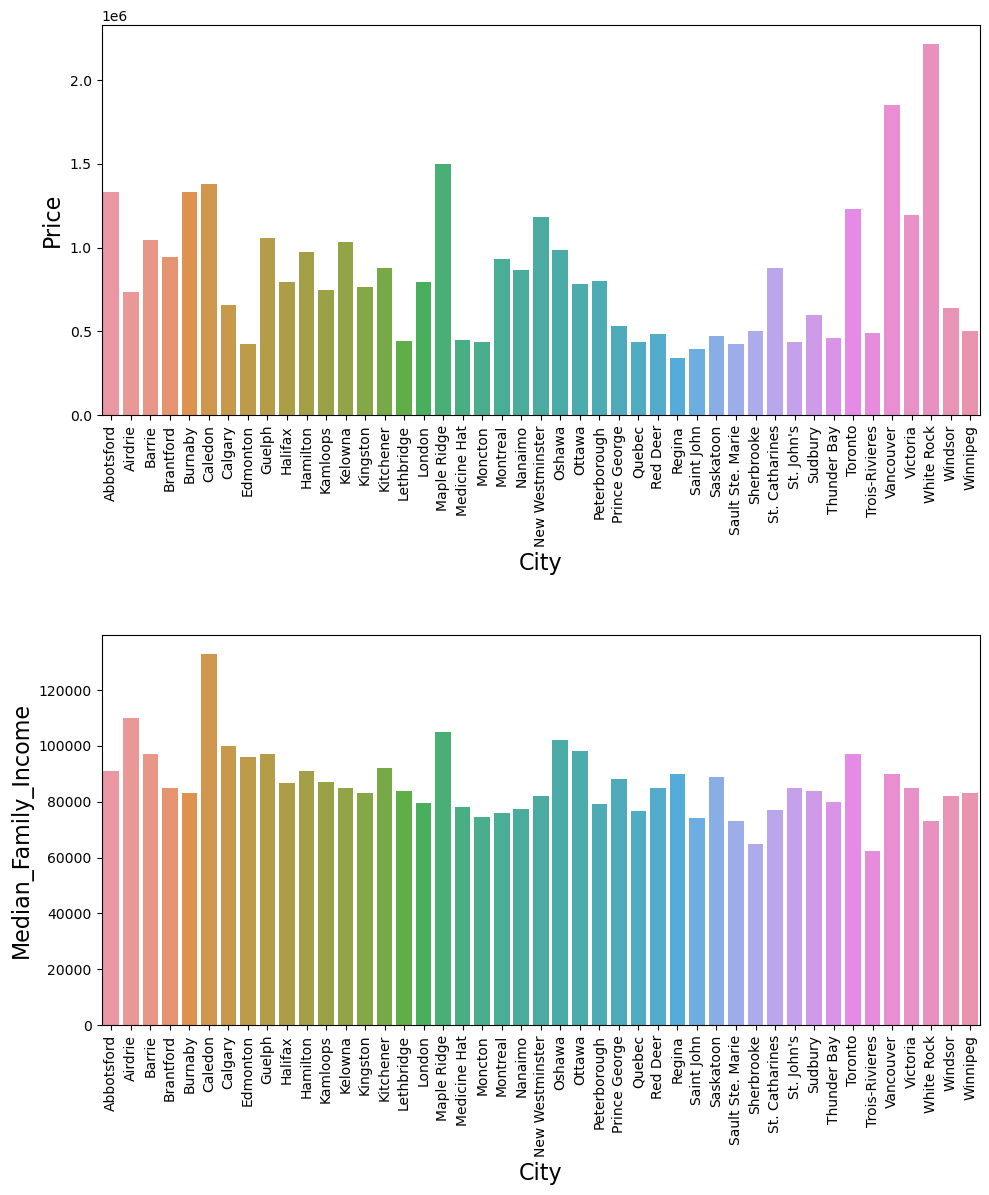

In [13]:
# We plot them

plt.figure(figsize=(10,10))

plt.subplot(211)
plt.xticks(rotation=90)
plt.xlabel('', fontsize=16)
plt.ylabel('Price',fontsize=16)
sns.barplot(x=tmp_df_city.index,y=tmp_df_city['Price'])

plt.subplot(212)
plt.xticks(rotation=90)
plt.xlabel('', fontsize=16)
plt.ylabel('Price',fontsize=16)
sns.barplot(x=tmp_df_city.index,y=tmp_df_city['Median_Family_Income'])

plt.tight_layout()
plt.subplots_adjust(top=7,bottom=6)

plt.show()

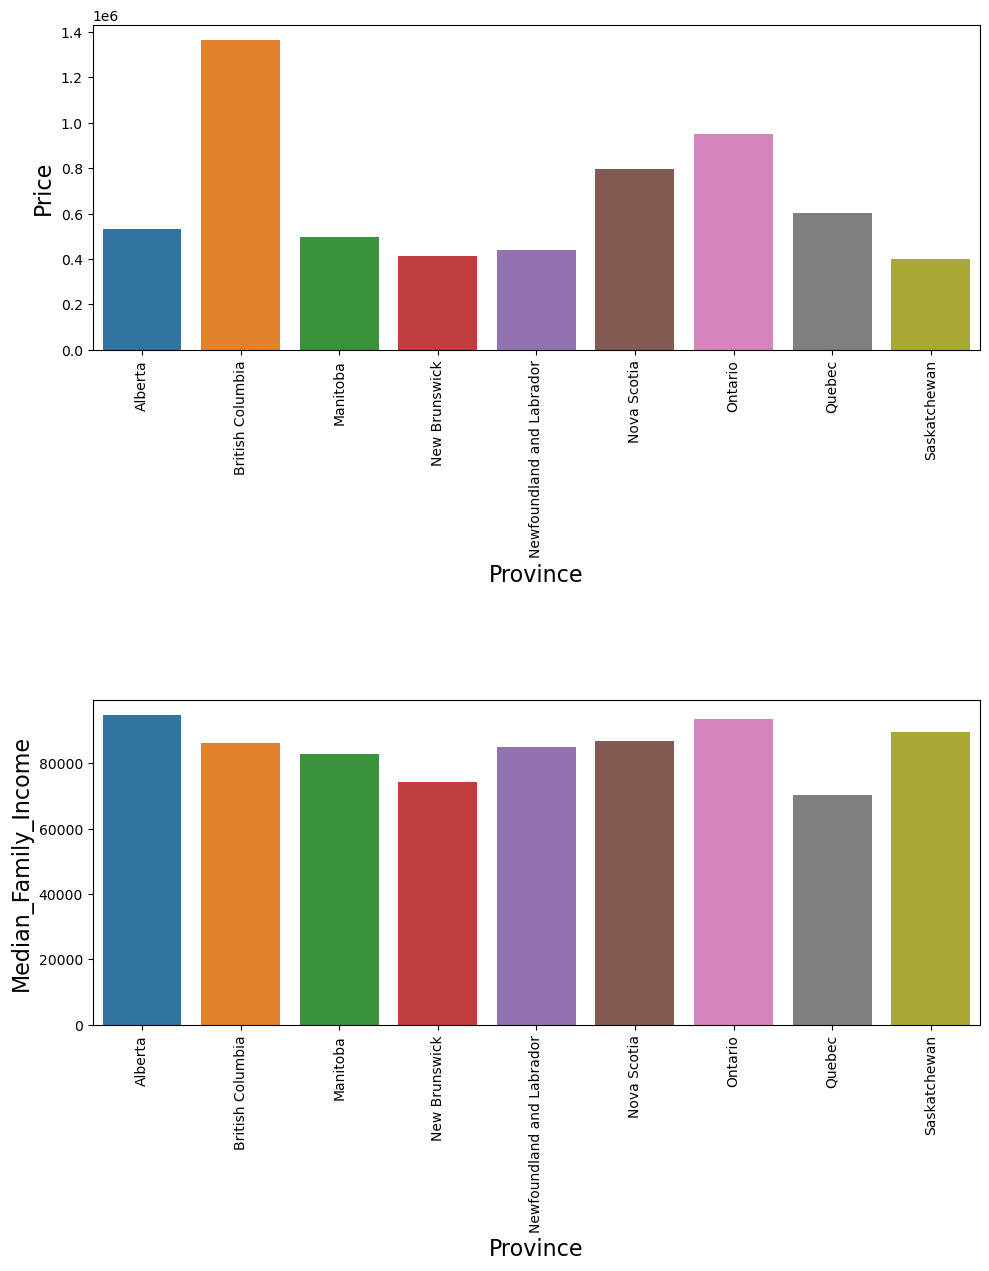

In [14]:
plt.figure(figsize=(10,10))

plt.subplot(211)
plt.xticks(rotation=90)
plt.xlabel('', fontsize=16)
plt.ylabel('Price',fontsize=16)
sns.barplot(x=tmp_df_province.index,y=tmp_df_province['Price'])

plt.subplot(212)
plt.xticks(rotation=90)
plt.xlabel('', fontsize=16)
plt.ylabel('Price',fontsize=16)
sns.barplot(x=tmp_df_province.index,y=tmp_df_province['Median_Family_Income'])

plt.tight_layout()
plt.subplots_adjust(top=7,bottom=6)

plt.show()

# Results

### 1. The most expensive cities in Canada:
1. White Rock 
2. Vancouver
3. Maple Ridge

### 2. The most Income earned:
1. Caledon
2. Airdine
3. Maple Ridge

#### There isn't any considerable corrolation between income and the price of the houses, however, as we can see 'Maple Ridge' in both category.


### 3.  Vancouver is the most expensive province in Canada by average 1.4 miliion dollars per house

#### The average income across provinces shows minimal variation

# Analyzing Data

## Part Two

**Now, this time we analyze the corrolation between price, number of beds, and other parameters**

In [15]:
for col in df.columns:
    if df[col].dtype == 'category':
        df[col] = df[col].cat.codes

In [16]:
df.corr('pearson')

,City,Price,Number_Beds,Number_Baths,Province,Population,Median_Family_Income
City,1.000000,0.027977,-0.061620,-0.080513,0.147506,0.256442,-0.410665
Price,0.027977,1.000000,0.327220,0.461831,-0.151475,0.075107,0.059941
Number_Beds,-0.061620,0.327220,1.000000,0.709427,0.064913,-0.103307,0.074562
Number_Baths,-0.080513,0.461831,0.709427,1.000000,-0.030938,-0.081778,0.131435
Province,0.147506,-0.151475,0.064913,-0.030938,1.000000,0.046145,0.099938
Population,0.256442,0.075107,-0.103307,-0.081778,0.046145,1.000000,0.134800
Median_Family_Income,-0.410665,0.059941,0.074562,0.131435,0.099938,0.134800,1.000000


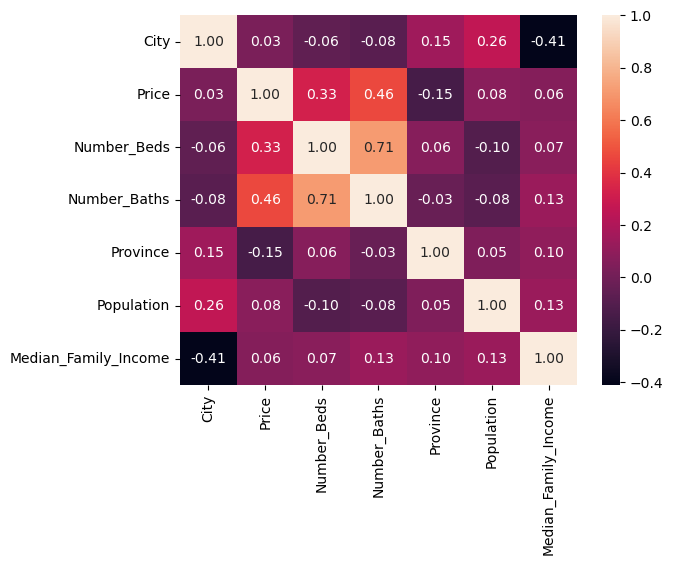

In [17]:
sns.heatmap(df.corr('pearson'), annot= True,  fmt='.2f')
plt.show()

# Result

**There is no significant corrolation between parameters. The only considerable one is between 'Number of Bedrooms' and'Number of Baths' with corrolation of 0.71 which is obvious.**

**The funniest part is that the corrolation between 'Number of Baths' and 'Price' (0.46) is more than 'Number of Bedrooms' (0.33)**